In [1]:
%matplotlib inline

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import color
from skimage import io
import os
from skimage.io import imread
from nose.tools import *
import skimage.io
from skimage import color
from skimage import io
import matplotlib.image as mpimg
from PIL import Image
from skimage.transform import resize
from skimage import*
from skimage import data, img_as_float

In [64]:
page1 =skimage.io.imread("data/page1.jpg")
page2 =skimage.io.imread("data/page2.jpg")

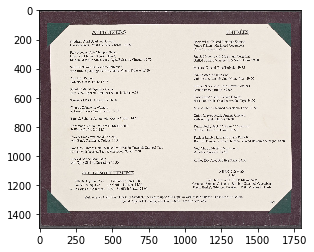

In [65]:
plt.imshow(page1)

In [66]:
img = color.rgb2gray(photoone_image)
img2=color.rgb2gray(phototwo_image)

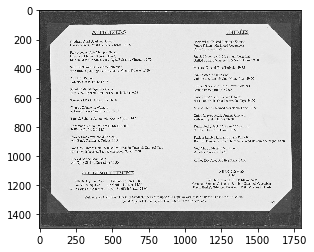

In [67]:
plt.imshow(img, cmap='gray')

In [12]:
top_left = (500, 200), bottom_right = (700, 300)
top_left = (500, 200), top_right = (500, 300), bottom_left = (700, 200), bottom_right = (700, 300)

SyntaxError: can't assign to literal (<ipython-input-12-c4ed63ebbb05>, line 1)

In [53]:
def crop_image(image, top_left, bottom_right):
    """
    Crops a grayscale image to the specified box. top_left and bottom_right are tuples
    of two elements. The first element in each tuple specifies the x coordinate, 
    and the second element specifies the y coordinate.
    """
    img=image[top_left[1]:bottom_right[0],top_left[1]:bottom_right[0]]
    #img=image[top_left[0]:top_left[1],top_left[1]:bottom_right[1],bottom_right[0]:top_left[1],bottom_right[0]:bottom_right[1]]
    return img

In [54]:
page1 = crop_image(photoone_image, (206, 124), (1700, 1245))
page2 = crop_image(phototwo_image, (873, 138), (1622, 1343))


In [55]:
page1.shape


(1370, 1576, 3)

In [56]:
page2.shape

(1348, 1484, 3)

In [57]:
def show_images(images):
    for image in images:
        plt.figure(figsize = (10, 8))
        plt.imshow(image, cmap = "gray")
        plt.show()

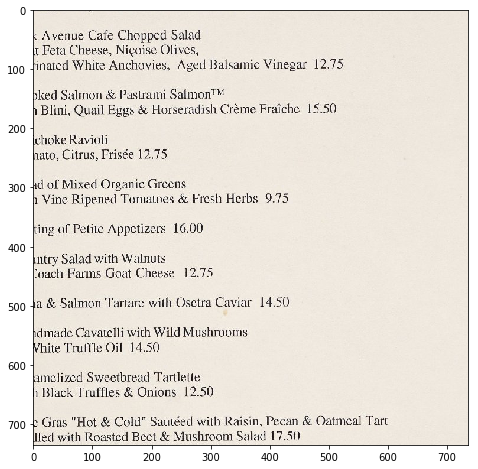

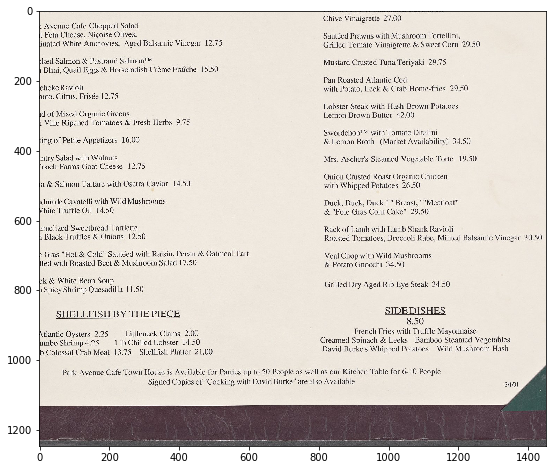

In [58]:
page1_left_cropped = crop_image(page1, (206, 124), (860, 1245))
page1_right_cropped = crop_image(page1, (1047, 124), (1700, 1245))
show_images([page1_left_cropped, page1_right_cropped])

In [59]:
def resize_images(images):
    """
    Resizes all images to have the same width
    """
    max_width = max([image.shape[1] for image in images])
    padded_images = [np.pad(image, ((0, 0), (0, max_width - image.shape[1])), mode = "constant", constant_values = 255) for image in images]
    return padded_images

In [61]:
def concatenate_images(images):
    """
    Concatenates all images vertically (one below the other)
    """
    
    for i in images:
        #img_new= np.vstack(image)
        imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in images ) )
        imgs_comb = PIL.Image.fromarray( imgs_comb)
       
    # YOUR CODE HERE
    return img_comb

In [63]:
combined_image = concatenate_images([page1_left_cropped, page1_right_cropped, page2_cropped])
show_images([combined_image])
assert_true(combined_image.shape[0] >  combined_image.shape[1]) # Long, narrow image

# Check dimensions
assert_equal(combined_image.shape[0], page1_left_cropped.shape[0] + page1_right_cropped.shape[0] + page2_cropped.shape[0])
assert_equal(combined_image.shape[1], max(page1_left_cropped.shape[1], page1_right_cropped.shape[1], page2_cropped.shape[1]))

NameError: name 'min_shape' is not defined